**Objectives**

1 Identify common skills across all jobs.

2 Highlight key skills for Data Analyst roles.

3 Extract important skills for HDFC Bank jobs.

4 Analyze years of experience vs skill requirements.


**Dataset Columns**

job_role, company, experience, salary, location,
rating, reviews, resposibilities.

**Approach**

1. **Clean Data:**

  a. Standardize skill names from resposibilities.

  b. Handle missing or inconsistent values.

2. **Skill Analysis:**

  a  Find frequent skills across all roles.

  b  Filter and analyze skills for:

        i. Data Analyst roles.
    
        ii. HDFC Bank listings.

3. **Experience Analysis:**

  a. Group jobs by experience range.
  
  b. Compare skill trends across these groups.


### 1. Data Exploration

In [69]:
import pandas as pd
df = pd.read_csv('jobs.csv')

df.head()

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on,job_link,company_link
0,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110 Reviews,"Customer Service,Sales,Relationship Management",1 Day Ago,https://www.naukri.com/job-listings-branch-ban...,https://www.naukri.com/hdfc-bank-jobs-careers-213
1,6.012391e+10,Product Owner Senior Manager,Accenture,11-15 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Product management,Market analysis,Change mana...",1 Day Ago,https://www.naukri.com/job-listings-product-ow...,https://www.naukri.com/accenture-jobs-careers-...
2,6.012391e+10,Employee Relations and Policies Associate Manager,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
3,6.012391e+10,Employee Relations and Policies Specialist,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
4,6.012301e+10,SAP BO Consultant,Mindtree,5-7 Yrs,Not disclosed,"Hybrid - Kolkata, Hyderabad/Secunderabad, Pune...",4.1,3759 Reviews,"SAP BO,PL / SQL,Oracle SQL,SAP Business Object...",1 Day Ago,https://www.naukri.com/job-listings-sap-bo-con...,https://www.naukri.com/mindtree-jobs-careers-3...


#### 1.1. Checking & removing Null values

Removing rows with missing values in key columns: **job_id**, **experience**, **resposibilities**, and **company**.

In [70]:
df = df.dropna(subset = ['job_id','experience','resposibilities','company'])

df.isnull().sum()

,0
job_id,0
job_role,0
company,0
experience,0
salary,0
location,0
rating,35401
reviews,35401
resposibilities,0
posted_on,0


#### 1.2 Remove Un-necessary Colums

In [71]:
df = df.drop(columns = ['company_link','job_link','posted_on','location','rating','reviews'])

df.isnull().sum()

,0
job_id,0
job_role,0
company,0
experience,0
salary,0
resposibilities,0


#### 1.3 Checking Duplicate values


In [72]:
df = df.drop_duplicates(subset = 'job_id')

In [73]:
df['job_id'].nunique() == len(df['job_id'])

True

### 2. Data Cleaning



#### 2.1 Typecast Job_id

In [74]:
df['job_id'] = df['job_id'].astype('int')


#### 2.2 Cleaning experince column
**Extracting Experience Range**

Splitting the experience column to create min_exp and max_exp for easier analysis.

In [75]:
df['min_exp'] = df['experience'].str.replace(' Yrs','').str.strip().str.split('-').str[0].astype('int')
df['max_exp'] = df['experience'].str.replace(' Yrs','').str.strip().str.split('-').str[1].astype('int')

df.head()

,job_id,job_role,company,experience,salary,resposibilities,min_exp,max_exp
0,70123006070,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,"Customer Service,Sales,Relationship Management",1,6
1,60123905908,Product Owner Senior Manager,Accenture,11-15 Yrs,Not disclosed,"Product management,Market analysis,Change mana...",11,15
2,60123905898,Employee Relations and Policies Associate Manager,Accenture,3-7 Yrs,Not disclosed,"Business process,Change management,Team manage...",3,7
3,60123905897,Employee Relations and Policies Specialist,Accenture,3-7 Yrs,Not disclosed,"Business process,Change management,Team manage...",3,7
4,60123008332,SAP BO Consultant,Mindtree,5-7 Yrs,Not disclosed,"SAP BO,PL / SQL,Oracle SQL,SAP Business Object...",5,7


#### 2.3 Clean Salary Coloum
**Cleaning Salary Data**

Extracting min_salary and max_salary from the salary column, handling special cases, and removing irrelevant salary entries for accurate analysis.

In [76]:
df['clean_salary'] = df['salary'].str.replace(' PA.','').str.replace(',','').str.split('-').str[0].str.strip()
df = df[(df['clean_salary'] != '9.5 Cr and above') & (df['clean_salary'] != 'Less than 5000') &  (df['clean_salary'] != 'Less than 50000')]
df['min_salary'] = df['clean_salary'].str.split('(').str[0].str.strip()
del df['clean_salary']

In [77]:
df['clean_salary'] = df['salary'].str.replace('PA.','').str.replace(',','').str.split('-').str[1].str.split('(').str[0].str.strip()
df = df[df['clean_salary'] != '9.5 Cr and above']
df['max_salary'] = df['clean_salary'].fillna('Not disclosed')

del df['clean_salary']
del df['salary']
del df['experience']


<ipython-input-77-0a14c4e6bffb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max_salary'] = df['clean_salary'].fillna('Not disclosed')


### 3. Data Analysis

#### 3.1 What are the skills are needed for almost all the jobs

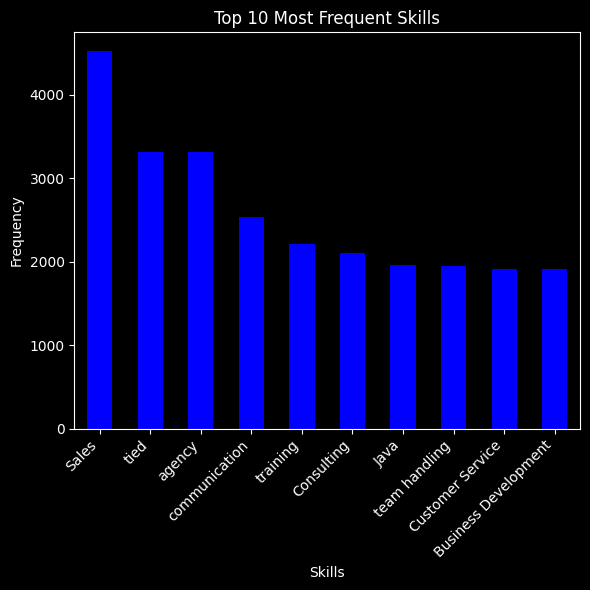

In [106]:
import matplotlib.pyplot as plt

skill_counts = df['resposibilities'].str.split(',').explode().value_counts().head(10)

plt.figure(figsize=(6, 6))  # Adjust figure size as needed
skill_counts.plot(kind='bar', color='blue')
plt.title('Top 10 Most Frequent Skills')
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

3.2 What are the most skills for a Data Analyst

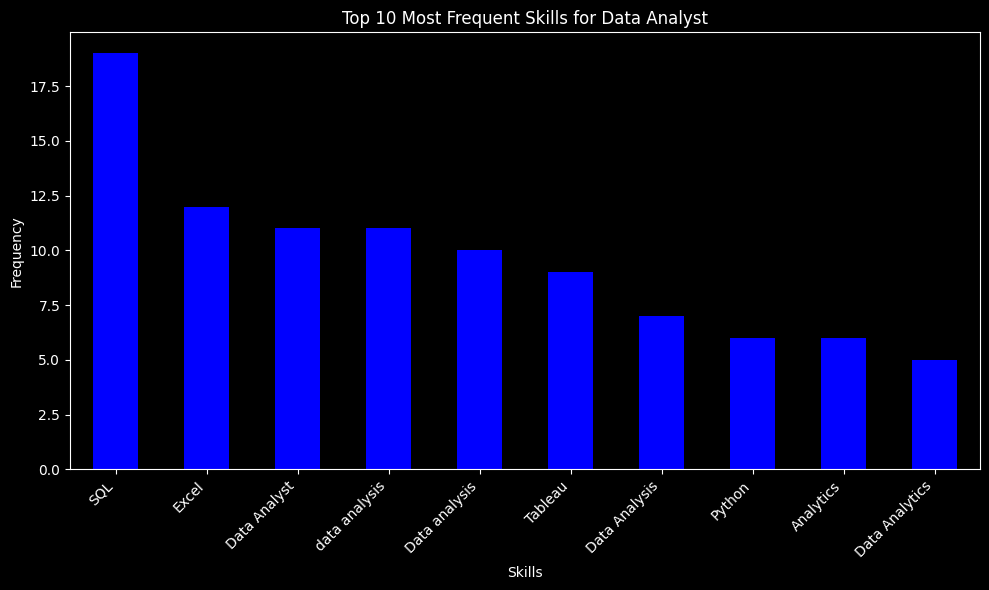

In [101]:
skill_counts = df[df['job_role'] == 'Data Analyst']['resposibilities'].str.split(',').explode().value_counts().head(10)

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
skill_counts.plot(kind='bar', color='blue')
plt.title('Top 10 Most Frequent Skills for Data Analyst')
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

3.3 What are the most important skills to go hired in HDFC Bank

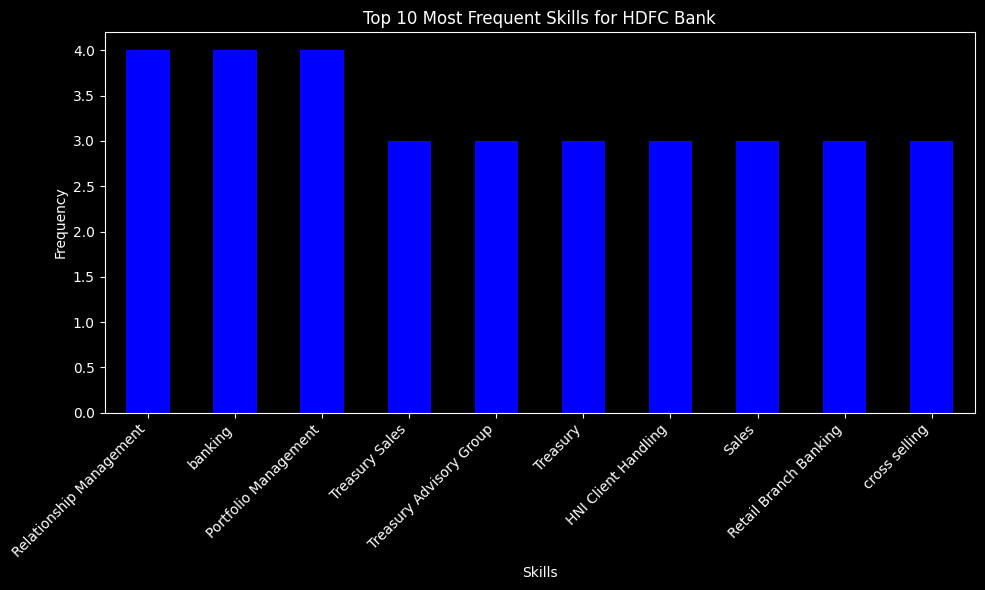

In [100]:
skill_counts = df[df['company'] == 'Hdfc Bank']['resposibilities'].str.split(',').explode().value_counts().head(10)

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
skill_counts.plot(kind='bar', color='blue')
plt.title('Top 10 Most Frequent Skills for HDFC Bank')
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

#### 3.4 Years of Exp Vs Requirements

In [81]:
exp = 0

df[(df['max_exp'] >= exp) & (df['min_exp'] <= exp)] ['resposibilities'].str.split(',').explode().value_counts().head(10)

,count
resposibilities,
Customer Service,1192
BPO,1144
Sales,841
Voice Process,690
Communication Skills,655
Customer Support,473
International Call Center,418
Business Development,410
Recruitment,389


In [82]:
df['max_exp'].min()
df['max_exp'].max()

31

In [83]:
for exp in range(0,32):
  print(exp, len(df[(df['max_exp'] >= exp) & (df['min_exp'] <= exp)]))

0 9643
1 20057
2 28586
3 34989
4 37810
5 43254
6 35924
7 29277
8 25497
9 18275
10 16483
11 6941
12 6362
13 4162
14 3154
15 3161
16 2067
17 1876
18 1761
19 1449
20 1460
21 427
22 401
23 309
24 288
25 153
26 81
27 70
28 58
29 47
30 40
31 11


In [84]:
experience = []
job_counts = []

for exp in range(0,32):
  experience.append(exp)
  job_counts.append(len(df[(df['max_exp'] >= exp) & (df['min_exp'] <= exp)]))


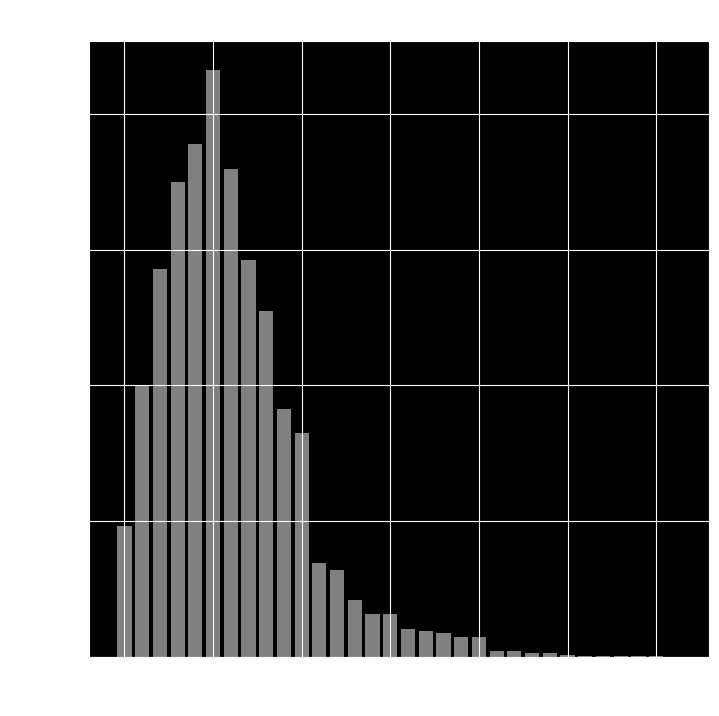

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize= (8,8))
plt.style.use('dark_background')
plt.grid(True)
plt.bar(experience, job_counts, color ='grey')
plt.xlabel('Years of Experience', fontsize = 16 )
plt.ylabel('Number of Jobs',fontsize = 16)
plt.title('Years of Experience vs. Number of Jobs', fontsize=22)

plt.show()



#### 3.5 Average salary by Hdfc Bank

In [86]:
df_ = df[df['company'] == 'Hdfc Bank']

((df_[df_['min_salary'] != 'Not disclosed']['min_salary'].astype('int') + df_[df_['max_salary'] != 'Not disclosed']['max_salary'].astype('int'))/2).astype('int').mean()


np.float64(693750.0)

In [87]:
df_[df_['min_salary'] != 'Not disclosed']['min_salary'].astype(int).mean()

np.float64(494318.1818181818)

In [88]:
df_[df_['max_salary'] != 'Not disclosed']['max_salary'].astype(int).mean()

np.float64(893181.8181818182)

#### 3.6 Average Salary by Every Company

<ipython-input-103-f0ea59a7252b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['min_salary'] = df_['min_salary'].astype('int')


<Axes: xlabel='company'>

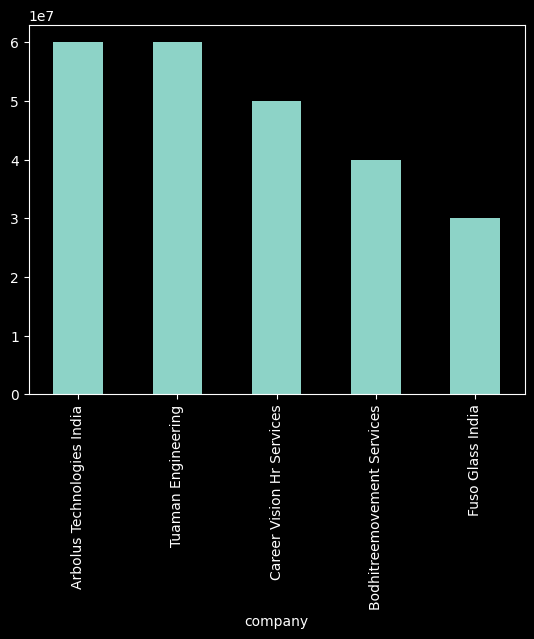

In [103]:
df_ = df[df['min_salary'] != 'Not disclosed']
df_['min_salary'] = df_['min_salary'].astype('int')
df_.groupby('company')['min_salary'].mean().sort_values(ascending = False).head().plot(kind = 'bar')



<ipython-input-90-f2eda5f651d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['max_salary'] = df_['max_salary'].astype('int')


<Axes: xlabel='company'>

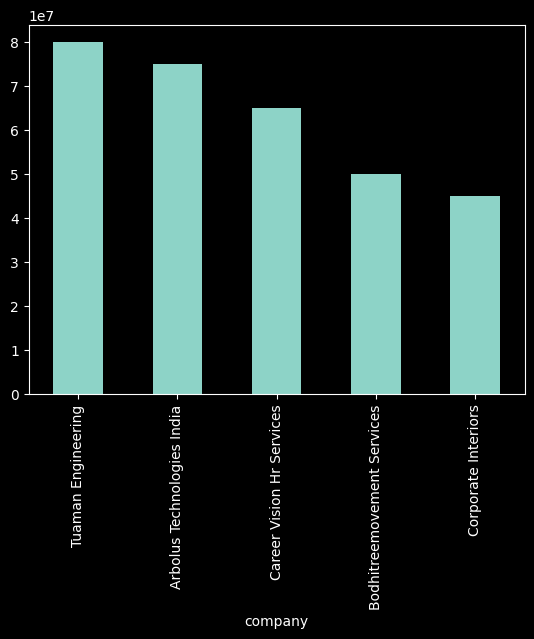

In [90]:
df_ = df[df['max_salary'] != 'Not disclosed']
df_['max_salary'] = df_['max_salary'].astype('int')
df_.groupby('company')['max_salary'].mean().sort_values(ascending = False).head().plot(kind = 'bar')


In [91]:
df.to_csv('Clean_jons.csv')